# Aula 1 - Limpeza e Tratamento dos dados

**Professores:**
- Jhonatan Ramos
- Vinícius "Mumu" Rodrigues

## 1. Contexto e motivação

### 1.1. De onde vêm os dados?

Você, membro do Insper Data e aluno do Ciclo Básico, naturalmente já passou noites em claro, suando frio e se questionando: “De onde vêm os dados? Onde vivem? O que comem? O que fazem?”. Embora o Globo Repórter ainda não esteja interessado em responder perguntas tão pertinentes (alô Sandra Annemberg, convida a gente), o Time Educacional do Insper Data não lhe deixará na mão.

Sem muito lero-lero, vamos direto ao assunto: **de onde vêm os dados?**

<div style="text-align: center;">
    <img src='./img/globo_reporter.png' style="width: 500px;">
    <p style="font-style: italic;">Jhonatan Ramos, Diretor Educacional, em mais um dia de trabalho desvendando os mistérios dos dados</p>
</div>

Embora pareça, os dados não vêm na caixa do Banco Imobiliário (pelo menos não do tipo em que estamos interessados). São resultados de coleta ativa e intencional, que pode ocorrer de maneira física, por meio de formulários ou pesquisas *in loco*, como no caso do IBGE ou da prova do ENEM, ou por meio de sistemas automatizados de monitoramento de atividade, como no registro de transações realizadas em uma loja online.

A determinação de quais dados coletar, em qual volume e por qual meio, decorre de uma análise minuciosa que pode envolver diversas partes interessadas em uma empresa ou na sociedade.

Independentemente das dúvidas que guiarão o processo de montagem do sistema de coleta, uma certeza prevalece: no momento em que esse sistema entrar em contato com o mundo real (e com pessoas reais) ele falhará.

Do ponto de vista da Ciência de Dados, essa falha se manifesta como ruído: respostas em branco, erros de digitação, categorias inconsistentes, registros duplicados, valores impossíveis ou medições imprecisas. Seja por interferência sistemática, seja por mero acaso, o dado nunca nasce perfeito.

Trataremos em profundidade, ao longo do Ciclo Básico, dos aspectos relativos à coleta, utilização e às partes interessadas no contexto de bases de dados. Porém, daremos início a essa jornada a partir do que é mais mundano, e mais inevitável, no mundo da Ciência de Dados: a sujeira.

### 1.2. A sujeira

<div style="text-align: center;">
    <img src="./img/sujeira.jpg" style="width: 500px;" />
    <p style="font-style: italic;">Aqui estão duas fotos. Uma é da sua base de dados e outra de um lixão nas Filipinas. Qual é qual?</p>
</div>

As origens da sujeira em bases de dados são diversas e podem ser motivadas tanto pelo design do sistema de coleta quanto por comportamentos fora do esperado — ou pela combinação de ambos.

Vamos supor que os membros do Insper Data desejem realizar uma pesquisa demográfica entre alunos do Insper. O presidente João Braga sugere as seguintes perguntas:

1. Qual a sua idade?
2. Qual o seu curso?
3. Qual seu estado de origem?
4. Qual sua cidade de origem?

Parece um questionário simples e imune a erros, certo? Errado.

Considere a primeira pergunta. Um respondente nascido em 11/03/2004 poderia responder “21”, “21 anos”, “vinte e um anos” ou até mesmo “vinte e um anos, onze meses e oito dias”, já que nenhuma especificação foi fornecida. Esse é um erro de design que inevitavelmente gerará inconsistência de formato na base de dados.

Percebendo o problema, o esperto Diretor de Pessoas, Sid, decide corrigir o questionário adicionando instruções claras:

1. Qual sua idade? (Em anos, apenas números. Exemplo: 21)
2. Qual o seu curso? (Assinale abaixo)

   * (a) Administração
   * (b) Ciência da Computação
   * (c) Direito
   * (d) Economia
   * (e) Engenharia da Computação
   * (f) Engenharia Mecânica
   * (g) Engenharia Mecatrônica
3. Qual seu estado de origem? (Apenas a sigla. Exemplo: “CE” para Ceará)
4. Qual sua cidade de origem?

Ainda assim, problemas permanecem. Alguns respondentes podem esquecer de responder uma pergunta, ignorar instruções ou cometer erros de digitação. Além disso, podemos deliberadamente criar perguntas de resposta opcional — como é comum em questões sobre sexualidade, por exemplo. Nesse caso, por design, estaríamos aceitando respostas vazias.

Isso ilustra um ponto central: a sujeira não é apenas um acidente. Ela é consequência natural de sistemas que interagem com o mundo real — e, em alguns casos, é uma escolha consciente de projeto.

Portanto, antes de qualquer análise, é essencial entender quais tipos de anomalias podem surgir nos dados e quais estratégias são adequadas para tratá-las.

## 2. Tipos comuns de "sujeira" nos dados

Vamos entrar no detalhe dos tipos de anomalias mais comuns em bases de dados. Para isso vamos usar a base `clientes.csv`. Se você ainda não possui essa base baixada, acesse o Google Drive do Ciclo Básico e faça o download do arquivo, em seguida crie um diretório `data` dentro da pasta `Aula 1` e adicione o arquivo `clientes.csv` dentro dela.

Pronto. Agora vamos abrir a base de dados usando a biblioteca **Pandas** do Python. Assegure-se de ter o Python instalado, assim como as bibliotecas utilizadas abaixo. Você também pode seguir as instruções do arquivo `README.md` deste repositório para utilizar o ambiente virtual configurado por nós, que contém todas as bibliotecas.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data/clientes.csv')
df.head(5)

,id_cliente,nome,email,idade,cidade,data_cadastro,telefone
0,679,GUSTAVO SLIVA,gustavo.sliva@gmail.com,32,rio de janeiro,2023-02-16 00:00:00,(70)92664-8803
1,880,Lucas dos Mendes,lucas.dos.mendes@empresa.com.br,41,sãopualo,2022-06-21 00:00:00,0000
2,901,pedro rocha,NaN,44,Salvador,2021-07-26 00:00:00,(83)91748-8658
3,244,Diego Pinto,diego.pinto256@yahoo.com.br,32,Niteroi,2022-05-11 00:00:00,XXXXX
4,329,HELENA MOURA,helena.moura@hotmail.com,79,sãopaulo,2023-04-25 00:00:00,(50)93669-3911


Lembre-se sempre de verificar as dimensões do seu dataset usando o comando `df.shape`. Saber quantas linhas tem o DataFrame será importante para estabelecer um parâmetro de comparação quando estivermos filtrando colunas ou removendo dados impróprios.

In [4]:
df.shape

(1248, 7)

### 2.1. Dados faltantes

Chamamos de dados faltantes (ou *missing values*) toda situação em que uma observação esperada não possui valor registrado. O sistema previa uma resposta, mas ela não está presente.

Isso pode acontecer por diferentes motivos:

- O respondente deixou a pergunta em branco.
- A pergunta era opcional.
- Houve erro de preenchimento ou falha no sistema.
- O dado simplesmente não foi coletado.

É importante notar: nem todo dado faltante é erro. Às vezes, ele é consequência do design do questionário; outras vezes, é falha operacional.

**Como identificar dados faltantes em uma base?**

Uma das formas mais simples é contar quantos valores ausentes existem em cada variável. Por exemplo, verificamos quantos emails estão faltando na base `clientes.csv` com o seguinte comando:

In [5]:
df['email'].isna().sum()

np.int64(111)

Esse comando faz três coisas:

- `isna()` identifica quais observações estão faltando (True para faltante, False caso contrário);
- `sum()` soma os True, contando quantos valores ausentes existem;
- o resultado nos diz quantos registros não possuem e-mail.

No nosso caso, encontramos **111 valores faltantes**.

### 2.2. Dados inconsistentes

Dizemos que há **dados inconsistentes** quando uma informação está registrada, mas não segue um padrão esperado.

Diferentemente dos dados faltantes, aqui o valor existe — porém aparece em formatos diferentes, grafias variadas ou categorias que deveriam representar a mesma coisa, mas foram registradas de formas distintas.

Isso pode acontecer por diversos motivos:

- Falta de padronização no sistema de coleta.
- Campo de resposta aberta quando deveria ser fechado.
- Erros de digitação.
- Uso de maiúsculas/minúsculas de forma inconsistente.
- Abreviações diferentes para o mesmo conceito.

Um exemplo clássico aparece na variável `cidade`.

In [6]:
df['cidade'].value_counts()

cidade
BH                    42
POA                   34
rio de janeiro        32
bh                    32
sp                    32
                      ..
 rio de janeiro        1
  Manaus               1
  Brasília             1
  RIO DE JANEIRO       1
fotraleza              1
Name: count, Length: 373, dtype: int64

O comando `value_counts` conta quantas vezes cada valor aparece em uma determinada coluna. Ele permite visualizar com facilidade categorias duplicadas sob grafias diferentes, além de ajudar a identificar padrões inesperados.

Ao aplicá-lo para a variável `cidade`, fica evidente o problema:

- `BH` e `bh` representam a mesma cidade.
- `rio de janeiro`, `Rio de Janeiro` e `RIO DE JANEIRO` também.
- Abreviações como `sp` convivem com nomes completos em outros registros.

Do ponto de vista semântico, são a mesma informação. Porém, do ponto de vista computacional, são categorias distintas.

Esse tipo de inconsistência pode:

- Inflar artificialmente o número de categorias.
- Distorcer gráficos e estatísticas.
- Prejudicar agrupamentos (groupby).
- Comprometer modelos que dependem de categorização correta.

### 2.3. Tipos incorretos

Nem toda inconsistência aparece como valor ausente ou erro de digitação. Em muitos casos, o problema está no tipo de dado atribuído à variável.

Uma coluna pode parecer correta na tabela, mas estar armazenada com um tipo inadequado. O erro não é visual, ele se manifesta apenas quando tentamos realizar operações como cálculos ou ordenações.

Para verificar o tipo de cada variável, podemos utilizar o comando `dtypes`:

In [7]:
df.dtypes

id_cliente       int64
nome               str
email              str
idade              str
cidade             str
data_cadastro      str
telefone           str
dtype: object

Esse comando:

- mostra o tipo de cada coluna do DataFrame;
- permite verificar se cada variável está representada da forma adequada para análise;
- ajuda a identificar possíveis inconsistências estruturais.

### 2.4. Duplicatas

**Duplicatas** são registros que aparecem mais de uma vez na base de dados, representando a mesma entidade ou a mesma observação.

A presença de duplicatas pode distorcer análises, inflar estatísticas e comprometer modelos preditivos. Se um mesmo cliente aparece duas vezes, por exemplo, ele passa a ter peso dobrado em qualquer cálculo.

Como a base possui um identificador ()`id_cliente`), é natural verificar se ele se repete:

In [8]:
df['id_cliente'].duplicated().sum()

np.int64(48)

Esse comando:

- marca como True os valores que já apareceram anteriormente;
- soma esses casos;
- retorna o número de identificadores repetidos.

No nosso caso, encontramos **48 registros** cujo `id_cliente` já havia aparecido anteriormente na base.

### 2.5. Outliers

Chamamos de outliers os valores que se distanciam significativamente do padrão observado na base de dados.

Eles podem surgir por:

- erro de digitação;
- falha no sistema de coleta;
- interpretação equivocada da pergunta;
- ou simplesmente por representarem casos raros, mas legítimos.

Diferentemente de dados faltantes ou duplicatas, outliers não são necessariamente erros. O desafio está em distinguir valores improváveis de valores impossíveis.

No nosso caso, a variável `idade` é candidata natural para investigação.

No entanto, como vimos anteriormente, ela ainda está armazenada como `object`. Para realizar qualquer análise numérica, precisamos convertê-la temporariamente.

In [9]:
idade_temp = pd.to_numeric(df['idade'], errors='coerce')

Podemos então inspecionar seus extremos:

In [10]:
idade_temp.describe()

count    1215.000000
mean       65.292181
std       123.617113
min       -25.000000
25%        32.000000
50%        50.000000
75%        70.000000
max       999.000000
Name: idade, dtype: float64

É notável que a grande maioria dos valores estão dentro do esperado, porém há outliers, que nesse caso são valores impossíveis (idades negativas ou muito elevadas).

## 3. Técnicas de limpeza e tratamento

### 3.1. Tratando valores faltantes

Na etapa de diagnóstico, identificamos a presença de valores ausentes na variável `email`.

Diferentemente de variáveis numéricas como `idade`, não há um critério objetivo para imputar um endereço de e-mail. Trata-se de uma informação identificadora, específica de cada registro. Portanto, não é apropriado substituir valores faltantes por média, mediana ou qualquer regra estatística.

Nesse contexto, a decisão mais consistente é remover os registros que não possuem e-mail.

In [28]:
df = df.dropna(subset=['email'])

O parâmetro:

* `subset=['email']` indica que a remoção deve considerar apenas a variável `email`.

Após a remoção, podemos verificar:

In [ ]:
df['email'].isna().sum()

O resultado esperado é **0**, indicando que não há mais valores faltantes nessa coluna.

**Observação**

A exclusão de registros é apenas uma das estratégias possíveis para lidar com dados faltantes.

Outras abordagens incluem:

* **Imputação estatística** (média, mediana, moda) — aplicável a variáveis numéricas;
* **Criação de categoria explícita** como "Não informado" — comum em variáveis categóricas;
* **Modelos preditivos de imputação** — em contextos mais avançados;
* **Manutenção dos valores ausentes**, quando a ausência é informativa.

A escolha do método depende:

* da natureza da variável;
* da proporção de valores ausentes;
* do objetivo da análise.

Neste caso específico, como o e-mail é uma informação essencial para identificação ou contato, optamos por manter apenas registros completos.


### 3.2. Padronização

Na etapa de diagnóstico, observamos que a variável `cidade` apresentava múltiplas grafias para a mesma informação:

* diferenças entre maiúsculas e minúsculas (`BH` vs `bh`);
* variações de capitalização (`rio de janeiro` vs `Rio de Janeiro`);
* possíveis abreviações e nomes completos convivendo na base.

Esse tipo de inconsistência não altera o significado da informação, mas fragmenta categorias que deveriam ser únicas.

**1. Normalização de texto**

O primeiro passo consiste em aplicar uma padronização estrutural:

In [19]:
df['cidade'] = (
    df['cidade']
        .str.strip()      # remove espaços extras
        .str.lower()      # converte para minúsculas
)

* `str.strip()` remove espaços no início e no fim;
* `str.lower()` elimina diferenças de capitalização.

Após essa etapa, `BH` e `bh` passam a ser tratados da mesma forma.

**2. Padronização semântica**

Ainda assim, abreviações e nomes completos continuam sendo categorias distintas. Para resolver isso, utilizamos um dicionário de mapeamento:

In [22]:
mapeamento_cidades = {
    'bh': 'belo horizonte',
    'sp': 'são paulo',
    'rj': 'rio de janeiro',
    'poa': 'porto alegre',
    'sjc': 'são josé dos campos',
}

df['cidade'] = df['cidade'].replace(mapeamento_cidades)

Esse passo garante que representações alternativas sejam convertidas para uma forma única.

**Verificando**

Podemos comparar antes e depois utilizando:

In [23]:
df['cidade'].value_counts()

cidade
são paulo              123
belo horizonte         119
rio de janeiro         112
porto alegre            81
são josé dos campos     46
                      ... 
aslvador                 1
soãpaulo                 1
porot alegre             1
rio d ejaneiro           1
rio ed janeiro           1
Name: count, Length: 106, dtype: int64

Espera-se observar:

* redução no número de categorias distintas;
* consolidação das frequências;
* eliminação de variações artificiais.

**Observação**

Padronizar não significa “embelezar” o dado, mas torná-lo consistente.

O objetivo é garantir que cada categoria represente exatamente um conceito — nem mais, nem menos.

Com isso, evitamos distorções em contagens, gráficos e modelos que dependem da correta agregação das informações.

### 3.3. Conversão de tipos

Após a etapa de diagnóstico, identificamos que as variáveis `idade` e `data_cadastro` estavam armazenadas como `str`, embora representem, respectivamente, valores numéricos e datas.

Antes de qualquer análise estatística ou temporal, é fundamental corrigir seus tipos.

**Conversão da variável `idade`**

Primeiro, convertemos a coluna para numérica:

In [11]:
df['idade'] = pd.to_numeric(df['idade'], errors='coerce')

- `pd.to_numeric()` tenta converter os valores para número;
- `errors='coerce'` transforma entradas inválidas em `NaN`, evitando que erros interrompam a execução;
- a atribuição direta substitui a coluna original.

Após a conversão, verificamos:

In [12]:
df['idade'].dtype

dtype('float64')

Agora a variável aparece como `float64`, que é um formato numérico plausível para análises de idade.

**Conversão da variável `data_cadastro`**

A variável `data_cadastro` representa datas, mas estava armazenada como texto. Para permitir operações temporais, realizamos a conversão:

In [13]:
df['data_cadastro'] = pd.to_datetime(df['data_cadastro'], errors='coerce')

- `pd.to_datetime()` converte a coluna para o tipo `datetime64`;
- `errors='coerce'` transforma datas inválidas em `NaT` (equivalente temporal de `NaN`).

Verificando o tipo:

In [14]:
df['data_cadastro'].dtype

dtype('<M8[us]')

**Por que essa etapa é importante?**

A conversão correta de tipos permite:

- calcular média, mediana e desvio padrão da idade;
- aplicar filtros numéricos adequados;
- extrair ano, mês ou dia da data de cadastro;
- calcular tempo desde o cadastro;
- ordenar cronologicamente os registros.

Sem essa padronização estrutural, qualquer análise subsequente estaria sujeita a erros silenciosos ou interpretações equivocadas.

A partir deste ponto, as variáveis passam a estar adequadamente tipadas, permitindo avançar para o tratamento de inconsistências e valores extremos de forma segura.

### 3.4. Remoção de duplicatas

Na etapa de diagnóstico, identificamos a existência de **48 registros duplicados** com base na variável `id_cliente`.

Como `id_cliente` deve representar um identificador único, sua repetição indica redundância na base. Nesses casos, a abordagem mais direta consiste em manter apenas uma ocorrência de cada identificador.

**Verificação inicial**

Antes da remoção, podemos confirmar a quantidade de duplicatas:

In [16]:
df['id_cliente'].duplicated().sum()

np.int64(48)

**Remoção das duplicatas**

Para manter apenas a primeira ocorrência de cada `id_cliente`, utilizamos:

In [17]:
df = df.drop_duplicates(subset='id_cliente', keep='first')

Parâmetros utilizados:

* `subset='id_cliente'` → define a coluna usada como critério de duplicação;
* `keep='first'` → mantém a primeira ocorrência e remove as demais.

Confirmamos a remoção:

In [18]:
df['id_cliente'].duplicated().sum()

np.int64(0)

**Observação**

A decisão de manter a primeira ocorrência pressupõe que:

* não há diferença relevante entre os registros duplicados;
* ou que a primeira entrada é considerada a versão válida.

Em contextos reais, pode ser necessário investigar os registros repetidos antes da exclusão, especialmente se houver divergências entre eles.

Neste caso, como `id_cliente` deve ser único por definição, a remoção das duplicatas garante a integridade estrutural da base.

### 3.5. Remoção de outliers

Após a conversão para tipo numérico, é possível analisar a distribuição da variável `idade` e identificar valores extremos.

Uma inspeção inicial pode ser feita com:

In [24]:
df['idade'].describe()

count    1167.000000
mean       65.697515
std       125.982922
min       -25.000000
25%        31.000000
50%        50.000000
75%        70.000000
max       999.000000
Name: idade, dtype: float64

Ou visualmente:

<Axes: >

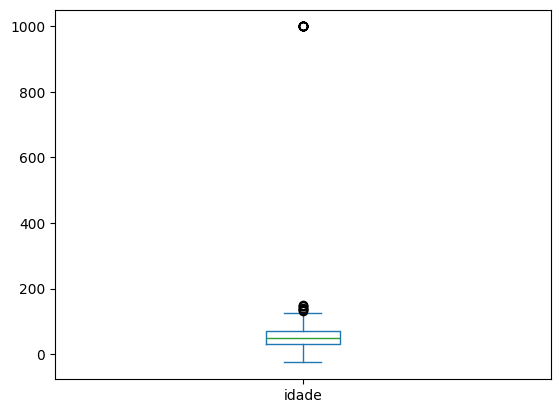

In [25]:
df['idade'].plot.box()

A partir dessa análise, observamos a presença de valores incompatíveis com o contexto da base — por exemplo, idades muito elevadas ou negativas.

#### Definição de critério

Antes de remover ou ajustar valores, é necessário definir um critério objetivo.

Duas abordagens comuns são:

**1. Critério de domínio (regra de negócio)**

Se sabemos que a base se refere a alunos de graduação, por exemplo, podemos definir limites plausíveis:

* idade mínima: 15 anos
* idade máxima: 100 anos

In [26]:
df = df.loc[(df['idade'] >= 15) & (df['idade'] <= 100), :]

**2. Critério estatístico (IQR)**

Uma alternativa é utilizar o intervalo interquartil:

In [27]:
Q1 = df['idade'].quantile(0.25)
Q3 = df['idade'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

df = df.loc[(df['idade'] >= limite_inferior) & (df['idade'] <= limite_superior), :]

## Observação importante

Outliers não são automaticamente erros.

* Um valor extremo pode ser fruto de erro de digitação (ex: 222 anos).
* Pode ser erro de unidade.
* Ou pode ser um caso raro, mas legítimo.

Por isso, o tratamento deve sempre ser contextualizado.

Neste caso, considerando a natureza da base, valores extremamente elevados ou negativos não são plausíveis — portanto, optamos por tratá-los como inválidos.


## 4. Mão na massa

Continue fazendo a limpeza da base `clientes.csv`. Começamos bem, mas ainda há muito a ser corrigido. Você pode pedir ajuda dos professores para identificar outras falhas e tratá-las.